In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
flights = pd.read_csv(r'C:\Users\ASUS\Downloads\flights.csv\flights.csv')
flights=flights.sample(n=100000)
flights.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
4370469,2015,9,30,3,DL,765,N938AT,SJC,LAX,627,...,743.0,-7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
744847,2015,2,19,4,DL,978,N681DA,SAN,SLC,615,...,903.0,-7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4515578,2015,10,9,5,AS,264,N318AS,14057,14771,735,...,915.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3657900,2015,8,15,6,AA,1261,N565AA,AUS,LAX,1745,...,1836.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
655912,2015,2,13,5,EV,5405,N753EV,LGA,CLE,910,...,1125.0,15.0,0,0,NaN,4.0,0.0,11.0,0.0,0.0


In [3]:
flights.shape
     

(100000, 31)

In [4]:
flights.isnull().values.any()
     

True

In [5]:
#Checking how many null values are there in each columns
flights.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER              265
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          1556
DEPARTURE_DELAY         1556
TAXI_OUT                1621
WHEELS_OFF              1621
SCHEDULED_TIME             0
ELAPSED_TIME            1877
AIR_TIME                1877
DISTANCE                   0
WHEELS_ON               1679
TAXI_IN                 1679
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            1679
ARRIVAL_DELAY           1877
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    98370
AIR_SYSTEM_DELAY       81840
SECURITY_DELAY         81840
AIRLINE_DELAY          81840
LATE_AIRCRAFT_DELAY    81840
WEATHER_DELAY          81840
dtype: int64

<AxesSubplot:xlabel='CANCELLATION_REASON', ylabel='count'>

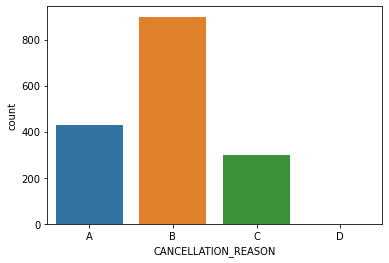

In [6]:
sns.countplot(x='CANCELLATION_REASON',data=flights)
     

Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security

We can observe from graph easily that mostly weather is responsible for delays of flight.

<AxesSubplot:xlabel='MONTH', ylabel='count'>

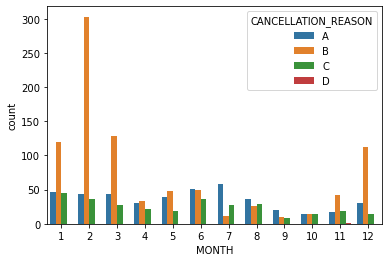

In [7]:
sns.countplot(x="MONTH",hue="CANCELLATION_REASON",data=flights)

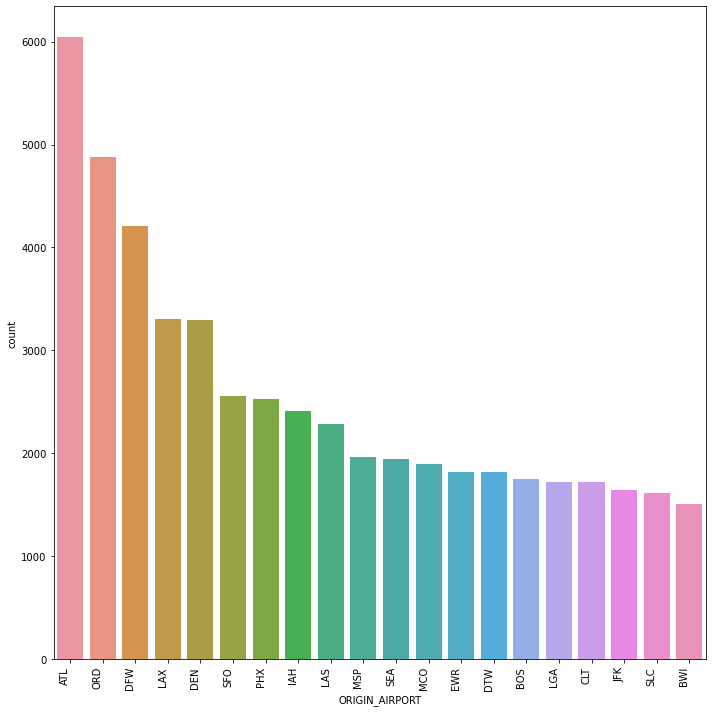

In [8]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=flights['ORIGIN_AIRPORT'], data =flights, order=flights['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()
     

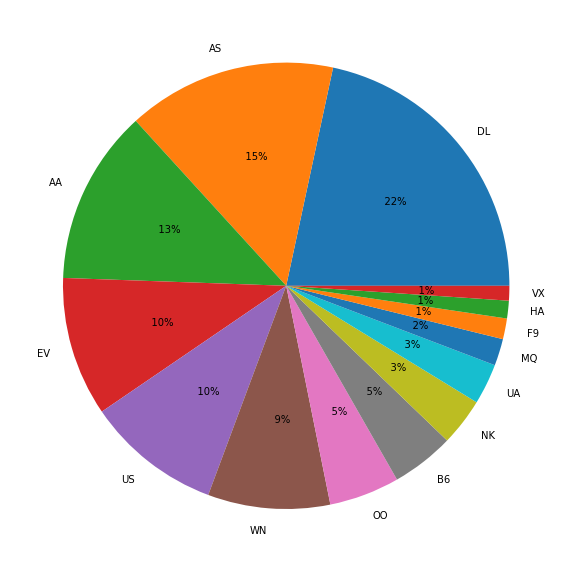

In [9]:
axis = plt.subplots(figsize=(10,14))
Name = flights["AIRLINE"].unique()
size = flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

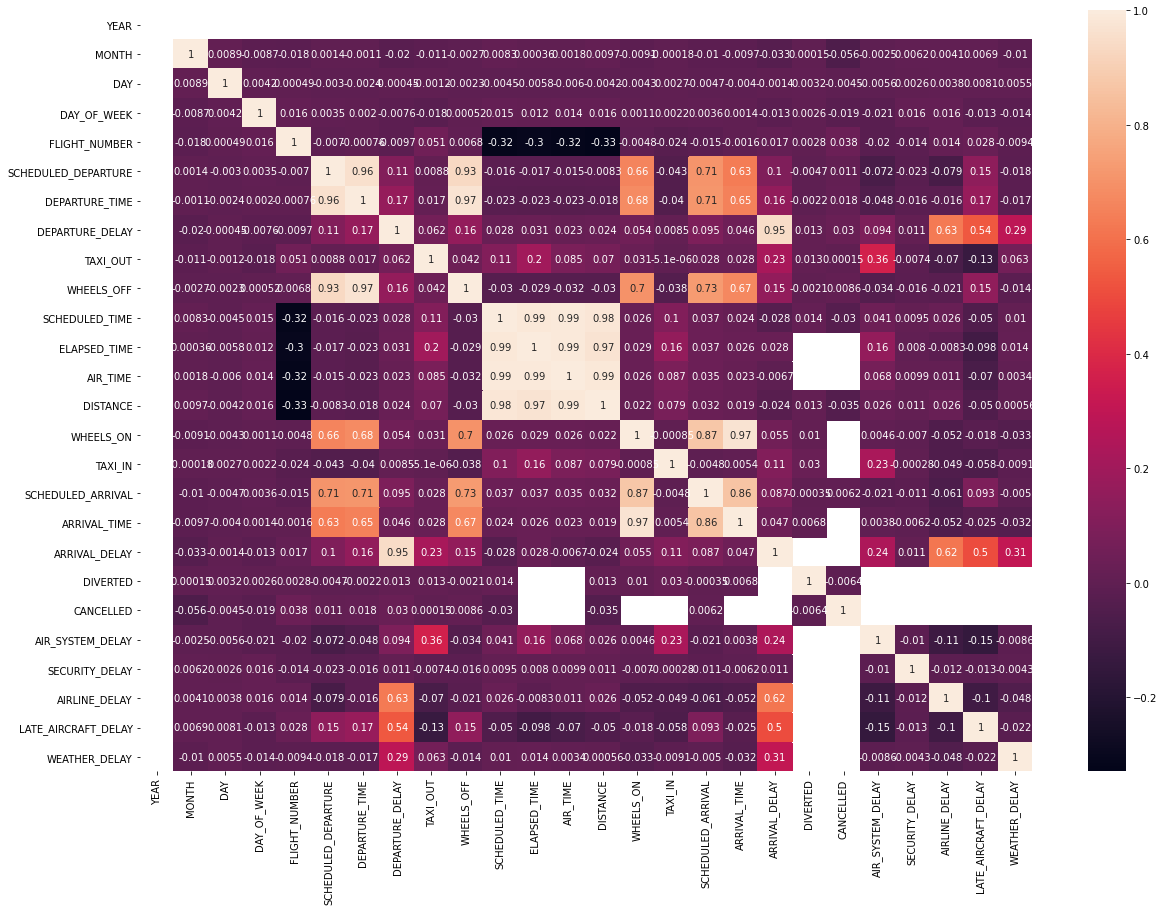

In [10]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(flights.corr(),annot = True)
plt.show()
     

Very High Correlation Between Arrival Delay and Departure Delay¶

It shows that maximum of the Arrival Delays are due to the Departure Delays.

In [11]:
corr=flights.corr()
corr
     

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.008902,-0.008728,-0.017770,0.001424,-0.001144,-0.020153,-0.010988,-0.002681,...,-0.010077,-0.009654,-0.032603,0.000146,-0.055933,-0.002485,0.006175,0.004073,0.006864,-0.010317
DAY,NaN,0.008902,1.000000,0.004213,0.000490,-0.003005,-0.002390,-0.000454,-0.001235,-0.002303,...,-0.004688,-0.003974,-0.001400,0.003228,-0.004537,-0.005580,0.002605,0.003844,0.008130,0.005502
DAY_OF_WEEK,NaN,-0.008728,0.004213,1.000000,0.016233,0.003523,0.002013,-0.007568,-0.018151,0.000517,...,0.003600,0.001410,-0.012624,0.002580,-0.019147,-0.021328,0.015640,0.016468,-0.012780,-0.013875
FLIGHT_NUMBER,NaN,-0.017770,0.000490,0.016233,1.000000,-0.006955,-0.000759,-0.009723,0.050704,0.006827,...,-0.015429,-0.001568,0.016692,0.002822,0.038397,-0.020389,-0.014472,0.013533,0.028431,-0.009358
SCHEDULED_DEPARTURE,NaN,0.001424,-0.003005,0.003523,-0.006955,1.000000,0.962533,0.110621,0.008839,0.934896,...,0.708831,0.632218,0.101379,-0.004746,0.011123,-0.071773,-0.022804,-0.079269,0.147285,-0.017745
DEPARTURE_TIME,NaN,-0.001144,-0.002390,0.002013,-0.000759,0.962533,1.000000,0.167891,0.016941,0.970401,...,0.714161,0.651177,0.156452,-0.002244,0.017705,-0.047538,-0.016266,-0.015707,0.173430,-0.016628
DEPARTURE_DELAY,NaN,-0.020153,-0.000454,-0.007568,-0.009723,0.110621,0.167891,1.000000,0.061887,0.159245,...,0.095115,0.045570,0.947869,0.012779,0.030006,0.094347,0.011466,0.626511,0.536599,0.289444
TAXI_OUT,NaN,-0.010988,-0.001235,-0.018151,0.050704,0.008839,0.016941,0.061887,1.000000,0.042487,...,0.027827,0.027619,0.226038,0.012518,0.000154,0.364336,-0.007388,-0.070279,-0.127616,0.063361
WHEELS_OFF,NaN,-0.002681,-0.002303,0.000517,0.006827,0.934896,0.970401,0.159245,0.042487,1.000000,...,0.727939,0.671871,0.153625,-0.002054,0.008631,-0.033534,-0.015617,-0.020867,0.148535,-0.014361


In [12]:
corr=flights.corr()
corr
     

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.008902,-0.008728,-0.017770,0.001424,-0.001144,-0.020153,-0.010988,-0.002681,...,-0.010077,-0.009654,-0.032603,0.000146,-0.055933,-0.002485,0.006175,0.004073,0.006864,-0.010317
DAY,NaN,0.008902,1.000000,0.004213,0.000490,-0.003005,-0.002390,-0.000454,-0.001235,-0.002303,...,-0.004688,-0.003974,-0.001400,0.003228,-0.004537,-0.005580,0.002605,0.003844,0.008130,0.005502
DAY_OF_WEEK,NaN,-0.008728,0.004213,1.000000,0.016233,0.003523,0.002013,-0.007568,-0.018151,0.000517,...,0.003600,0.001410,-0.012624,0.002580,-0.019147,-0.021328,0.015640,0.016468,-0.012780,-0.013875
FLIGHT_NUMBER,NaN,-0.017770,0.000490,0.016233,1.000000,-0.006955,-0.000759,-0.009723,0.050704,0.006827,...,-0.015429,-0.001568,0.016692,0.002822,0.038397,-0.020389,-0.014472,0.013533,0.028431,-0.009358
SCHEDULED_DEPARTURE,NaN,0.001424,-0.003005,0.003523,-0.006955,1.000000,0.962533,0.110621,0.008839,0.934896,...,0.708831,0.632218,0.101379,-0.004746,0.011123,-0.071773,-0.022804,-0.079269,0.147285,-0.017745
DEPARTURE_TIME,NaN,-0.001144,-0.002390,0.002013,-0.000759,0.962533,1.000000,0.167891,0.016941,0.970401,...,0.714161,0.651177,0.156452,-0.002244,0.017705,-0.047538,-0.016266,-0.015707,0.173430,-0.016628
DEPARTURE_DELAY,NaN,-0.020153,-0.000454,-0.007568,-0.009723,0.110621,0.167891,1.000000,0.061887,0.159245,...,0.095115,0.045570,0.947869,0.012779,0.030006,0.094347,0.011466,0.626511,0.536599,0.289444
TAXI_OUT,NaN,-0.010988,-0.001235,-0.018151,0.050704,0.008839,0.016941,0.061887,1.000000,0.042487,...,0.027827,0.027619,0.226038,0.012518,0.000154,0.364336,-0.007388,-0.070279,-0.127616,0.063361
WHEELS_OFF,NaN,-0.002681,-0.002303,0.000517,0.006827,0.934896,0.970401,0.159245,0.042487,1.000000,...,0.727939,0.671871,0.153625,-0.002054,0.008631,-0.033534,-0.015617,-0.020867,0.148535,-0.014361


In [13]:
variables_to_remove=["YEAR","FLIGHT_NUMBER","TAIL_NUMBER","DEPARTURE_TIME","TAXI_OUT","WHEELS_OFF","ELAPSED_TIME","AIR_TIME","WHEELS_ON","TAXI_IN","ARRIVAL_TIME","DIVERTED","CANCELLED","CANCELLATION_REASON","AIR_SYSTEM_DELAY", "SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY","SCHEDULED_TIME","SCHEDULED_ARRIVAL"]
flights.drop(variables_to_remove,axis=1,inplace= True)
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [14]:
airport = pd.read_csv(r'C:\Users\ASUS\Downloads\airports.csv')
airport

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [15]:
flights.loc[~flights.ORIGIN_AIRPORT.isin(airport.IATA_CODE.values),'ORIGIN_AIRPORT']='OTHER'
flights.loc[~flights.DESTINATION_AIRPORT.isin(airport.IATA_CODE.values),'DESTINATION_AIRPORT']='OTHER'
flights
     

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4370469,9,30,3,DL,SJC,LAX,627,-3.0,308,-7.0
744847,2,19,4,DL,SAN,SLC,615,-4.0,626,-7.0
4515578,10,9,5,AS,OTHER,OTHER,735,-9.0,550,-12.0
3657900,8,15,6,AA,AUS,LAX,1745,-7.0,1242,-20.0
655912,2,13,5,EV,LGA,CLE,910,11.0,419,15.0
...,...,...,...,...,...,...,...,...,...,...
597872,2,9,1,AS,SEA,SFO,1410,-4.0,679,-4.0
4790262,10,26,1,UA,OTHER,OTHER,1519,100.0,414,76.0
2063693,5,11,1,UA,SEA,EWR,2116,35.0,2402,10.0
924460,3,2,1,UA,DEN,ORD,1518,4.0,888,-26.0


In [16]:
print(flights.ORIGIN_AIRPORT.nunique())
print(flights.DESTINATION_AIRPORT.nunique())
print(flights.AIRLINE.nunique())

319
320
14


In [17]:
flights=flights.dropna()
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4370469,9,30,3,DL,SJC,LAX,627,-3.0,308,-7.0
744847,2,19,4,DL,SAN,SLC,615,-4.0,626,-7.0
4515578,10,9,5,AS,OTHER,OTHER,735,-9.0,550,-12.0
3657900,8,15,6,AA,AUS,LAX,1745,-7.0,1242,-20.0
655912,2,13,5,EV,LGA,CLE,910,11.0,419,15.0
...,...,...,...,...,...,...,...,...,...,...
597872,2,9,1,AS,SEA,SFO,1410,-4.0,679,-4.0
4790262,10,26,1,UA,OTHER,OTHER,1519,100.0,414,76.0
2063693,5,11,1,UA,SEA,EWR,2116,35.0,2402,10.0
924460,3,2,1,UA,DEN,ORD,1518,4.0,888,-26.0


In [18]:
flights.shape
     

(98123, 10)

In [19]:
df=pd.DataFrame(flights)
df['DAY_OF_WEEK']= df['DAY_OF_WEEK'].apply(str)
df["DAY_OF_WEEK"].replace({"1":"SUNDAY", "2": "MONDAY", "3": "TUESDAY", "4":"WEDNESDAY", "5":"THURSDAY", "6":"FRIDAY", "7":"SATURDAY"},inplace=True)
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4370469,9,30,TUESDAY,DL,SJC,LAX,627,-3.0,308,-7.0
744847,2,19,WEDNESDAY,DL,SAN,SLC,615,-4.0,626,-7.0
4515578,10,9,THURSDAY,AS,OTHER,OTHER,735,-9.0,550,-12.0
3657900,8,15,FRIDAY,AA,AUS,LAX,1745,-7.0,1242,-20.0
655912,2,13,THURSDAY,EV,LGA,CLE,910,11.0,419,15.0
...,...,...,...,...,...,...,...,...,...,...
597872,2,9,SUNDAY,AS,SEA,SFO,1410,-4.0,679,-4.0
4790262,10,26,SUNDAY,UA,OTHER,OTHER,1519,100.0,414,76.0
2063693,5,11,SUNDAY,UA,SEA,EWR,2116,35.0,2402,10.0
924460,3,2,SUNDAY,UA,DEN,ORD,1518,4.0,888,-26.0


In [20]:
dums = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DAY_OF_WEEK']
df_cat=pd.get_dummies(df[dums],drop_first=True)
df_cat
     

,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
4370469,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
744847,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4515578,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3657900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
655912,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597872,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4790262,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2063693,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
924460,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [21]:
df_cat.columns

Index(['AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9',
       'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA',
       ...
       'DESTINATION_AIRPORT_WYS', 'DESTINATION_AIRPORT_XNA',
       'DESTINATION_AIRPORT_YAK', 'DESTINATION_AIRPORT_YUM',
       'DAY_OF_WEEK_MONDAY', 'DAY_OF_WEEK_SATURDAY', 'DAY_OF_WEEK_SUNDAY',
       'DAY_OF_WEEK_THURSDAY', 'DAY_OF_WEEK_TUESDAY', 'DAY_OF_WEEK_WEDNESDAY'],
      dtype='object', length=656)

In [22]:
df.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [23]:
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [24]:
var_to_remove=["DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"]
df.drop(var_to_remove,axis=1,inplace=True)
df

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4370469,9,30,627,-3.0,308,-7.0
744847,2,19,615,-4.0,626,-7.0
4515578,10,9,735,-9.0,550,-12.0
3657900,8,15,1745,-7.0,1242,-20.0
655912,2,13,910,11.0,419,15.0
...,...,...,...,...,...,...
597872,2,9,1410,-4.0,679,-4.0
4790262,10,26,1519,100.0,414,76.0
2063693,5,11,2116,35.0,2402,10.0
924460,3,2,1518,4.0,888,-26.0


In [25]:
data=pd.concat([df,df_cat],axis=1)
data
     

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
4370469,9,30,627,-3.0,308,-7.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
744847,2,19,615,-4.0,626,-7.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4515578,10,9,735,-9.0,550,-12.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3657900,8,15,1745,-7.0,1242,-20.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
655912,2,13,910,11.0,419,15.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597872,2,9,1410,-4.0,679,-4.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4790262,10,26,1519,100.0,414,76.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2063693,5,11,2116,35.0,2402,10.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
924460,3,2,1518,4.0,888,-26.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
data.shape


(98123, 662)

In [27]:
final_data = data.sample(n=60000)
final_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
209728,1,14,1515,0.0,1590,-16.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2455602,6,5,715,-4.0,488,-21.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
793819,2,22,1019,-4.0,625,-7.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4616134,10,15,1345,34.0,642,49.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5743503,12,27,804,-7.0,404,15.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190469,1,13,1105,35.0,529,39.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3635708,8,14,1120,-12.0,1096,-7.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1571329,4,11,1015,-6.0,829,-10.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197099,1,13,1755,-3.0,1047,-9.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [28]:
final_data.shape

(60000, 662)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [30]:
X=final_data.drop("DEPARTURE_DELAY",axis=1)
Y=final_data.DEPARTURE_DELAY
     

In [31]:
X

,MONTH,DAY,SCHEDULED_DEPARTURE,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
209728,1,14,1515,1590,-16.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2455602,6,5,715,488,-21.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
793819,2,22,1019,625,-7.0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4616134,10,15,1345,642,49.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5743503,12,27,804,404,15.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190469,1,13,1105,529,39.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3635708,8,14,1120,1096,-7.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1571329,4,11,1015,829,-10.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197099,1,13,1755,1047,-9.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [32]:
Y

209728      0.0
2455602    -4.0
793819     -4.0
4616134    34.0
5743503    -7.0
           ... 
190469     35.0
3635708   -12.0
1571329    -6.0
197099     -3.0
2721926    -1.0
Name: DEPARTURE_DELAY, Length: 60000, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
     

In [56]:
from sklearn.ensemble import RandomForestClassifier
reg_rf = RandomForestClassifier()
reg_rf.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
y_pred = reg_rf.predict(X_test)
     

In [36]:
reg_rf.score(X_train,y_train)

0.9897528061883959

In [37]:
reg_rf.score(X_test,y_test)

0.9372349049194184

In [38]:
metrics.r2_score(y_test,y_pred)
     

0.9372349049194184

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
     

MAE: 5.979559166666667
MSE: 97.04534905833334
RMSE: 9.851159782397875


In [40]:
pp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
pp

,Actual,Predicted
3850262,-16.0,-7.51
1809862,0.0,8.63
4052072,-4.0,-4.26
5750156,44.0,40.32
2237805,30.0,12.92
...,...,...
5355706,-11.0,0.25
3224968,-3.0,-4.08
4830451,-2.0,-1.00
3630448,7.0,-1.45


In [41]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [42]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
     

In [43]:
# Random search of parameters, using 5 fold cross validation,search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
     


In [44]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=  12.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=  12.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=  12.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=  12.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=  12.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=  22.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=  22.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 27, 44, 61, 79, 96,
                                                         113, 130, 148, 165,
                                                         182, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [45]:
rf_random.best_params_

{'n_estimators': 61,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [46]:
p=rf_random.predict(X_test)
     

In [47]:
metrics.r2_score(y_test,p)

0.9360225286603674

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test,p))
print('MSE:', metrics.mean_squared_error(y_test,p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,p)))
     

MAE: 5.965442661060544
MSE: 98.91988580680146
RMSE: 9.945847666579327


In [49]:
zz=pd.DataFrame({'Actual':y_test,'Predicted':p})
zz

,Actual,Predicted
3850262,-16.0,-7.656986
1809862,0.0,10.531874
4052072,-4.0,-4.753239
5750156,44.0,39.322217
2237805,30.0,12.210993
...,...,...
5355706,-11.0,-1.517607
3224968,-3.0,-3.192274
4830451,-2.0,-1.253678
3630448,7.0,0.815397


In [50]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=0)

In [51]:
GBR=gbr.fit(X_train,y_train)
pre=GBR.predict(X_test)

In [52]:
print('MAE:', metrics.mean_absolute_error(y_test,pre))
print('MSE:', metrics.mean_squared_error(y_test,pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pre)))
     

MAE: 5.927893142505249
MSE: 90.95040580033856
RMSE: 9.536792217529884


In [53]:
def predict(MONTH, DAY,SCHEDULED_DEPARTURE,DISTANCE, ARRIVAL_DELAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DAY_OF_WEEK):
    AIRLINE_index = np.where(X.columns==AIRLINE)[0][0]
    ORIGIN_index = np.where(X.columns==ORIGIN_AIRPORT)[0][0]
    DESTINATION_index = np.where(X.columns==DESTINATION_AIRPORT)[0][0]
    DAY_OF_WEEK_index = np.where(X.columns==DAY_OF_WEEK)[0][0]
    x= np.zeros(len(X.columns))
    x[0] = MONTH
    x[1] = DAY
    x[2] = SCHEDULED_DEPARTURE
    x[3] = DISTANCE
    x[4] = ARRIVAL_DELAY
    if AIRLINE_index >=0:
        x[AIRLINE_index] = 1
    if ORIGIN_index >=0:
        x[ORIGIN_index] = 1
    if DESTINATION_index >=0:
        x[DESTINATION_index] = 1
    if  DAY_OF_WEEK_index >= 0:
        x[ DAY_OF_WEEK_index] = 1

    return gbr.predict([x])[0]
     

In [54]:
res= predict(5,6,1515,328,-8.0,'AIRLINE_OO','ORIGIN_AIRPORT_PHX','DESTINATION_AIRPORT_ABQ','DAY_OF_WEEK_TUESDAY')
res

-3.606282230221444

In [55]:
if(res<=-15):
  print("Flight is delayed")
else:
  print("Flight is not delayed")

Flight is not delayed
